In [22]:
# Setup

import pandas as pd
from pathlib import Path
import hvplot.pandas
import requests
import json
from pprint import pprint
from config import geoapify_key
import numpy as np
import matplotlib.pyplot as plt

# Import and read files

file = Path("data/merged_df.csv")
df = pd.read_csv(file, encoding="utf-8")

df = df.drop("Unnamed: 0", axis=1)

In [32]:
# Group by country

by_country = df.groupby(["Country"])

avg_cagr = by_country["CAGR (%)"].mean()
number_startups = by_country.size()

country_df = pd.DataFrame({
    "Avg CAGR (%)": avg_cagr,
    "Number of Startups": number_startups
})

# Sort df

country_df = country_df.sort_values(by="Avg CAGR (%)", ascending = False)
country_df = country_df.reset_index()

country_df

,Country,Avg CAGR (%),Number of Startups
0,Lithuania,18.465000,2
1,Belgium,7.373333,3
2,Estonia,5.772000,5
3,Singapore,4.914615,13
4,Turkey,4.800000,3
5,Australia,3.248750,8
6,United States,2.386799,581
7,Israel,2.146667,18
8,South Korea,1.925385,13
9,Germany,1.018846,26


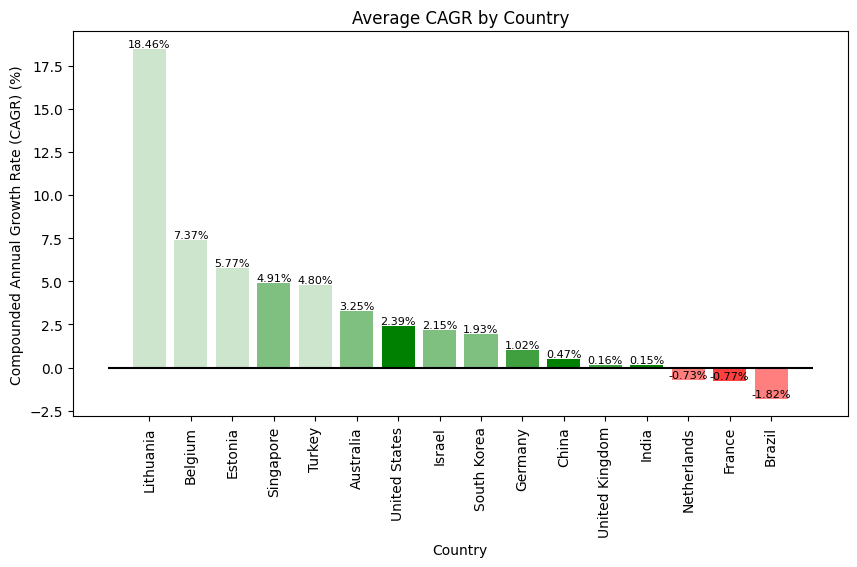

In [58]:
# Bar plot

# Filter out 0% CAGRs

country_df = country_df[country_df["Avg CAGR (%)"] != 0]

# Bar plot setup

countries = country_df["Country"].tolist()
cagr = country_df["Avg CAGR (%)"]
count = country_df["Number of Startups"]

plt.figure(figsize=(10, 5))

x_axis = np.arange(len(countries))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries, rotation=90)

colors = ["green" if x > 0 else "red" if x < 0 else "black" for x in cagr]
alphas = [1 if x > 50 else 0.75 if x > 20 else 0.5 if x > 5 else 0.2 for x in count]

bars = plt.bar(x_axis, cagr, 
               color=colors
               )

for bar, alpha in zip(bars, alphas):
    bar.set_alpha(alpha)

# Data labels

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%",
             ha="center", va="bottom", fontsize=8, color="black")

# Horizontal line at 0

plt.hlines(0, -1, len(countries), color="black")

# Chart labels

plt.xlabel("Country")
plt.ylabel("Compounded Annual Growth Rate (CAGR) (%)")
plt.title("Average CAGR by Country")

# Custom legend

legend_handls = [mpatches.Patch(color="green", alpha=1, label="Over 50 Startups"),
                 mpatches.Patch(color="green", alpha=0.75, label="Over 20 Startups"),
                 mpatches.Patch(color="green", alpha=0.5, label="Over 5 Startups")

# Save fig

plt.savefig("output_data/cagr_by_country.png", bbox_inches="tight")

plt.show()